### Importing required libraries

In [221]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

### Importing and studying the dataset

In [222]:
df = pd.read_csv("F:\DATA SCIENCE\MACHINE LEARNING\Random Forest\data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [223]:
df.shape

(569, 33)

There are 569 rows and 33 columns in our dataset

In [224]:
cols = df.columns
cols

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

These are the columns present in our dataset

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There are 32 numerical type (float + int type) columns and only 1 column (diagnosis) which is categorical (object type) 

In [226]:
# Descriptive Statistics and 5 point summary of our dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [227]:
# Checking null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

There is 1 column having all null values present in the dataset.

In [228]:
# Dropping null value column
data = df.drop('Unnamed: 32', axis = 1)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [229]:
# Unique Values in our target variable - Diagnosis
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [230]:
# Count of unique values in our target variable
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [231]:
# Converting categorical type column - diagnosis to numerical (Binary type) as it is our target variable and ML model
# understands only numerical type data
data['diagnosis'] = data['diagnosis'].apply(lambda x : 0 if x == 'B' else 1)
data.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
204,87930,0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
70,859575,1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
131,8670,1,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
431,907915,0,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
540,921385,0,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


### Spliting data into features and target values

In [232]:
x = data.iloc[:,1:].values # feature values
y = data['diagnosis'].values # target values

### Spliting the data into training and test sets

In [255]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

### Random Forest Classifier

In [256]:
# Set the random state for reproducability
fit_rf = RandomForestClassifier(random_state = 42)

### HyperParameter Optimization Using GridSearch CV

In [257]:
np.random.seed(42)
start = time.time()

param_dist = {'max_depth' : [2,3,4,5,6,7,8,9,10], 'criterion' : ['gini','entropy'], 'max_features' : ["auto", "sqrt", "log2"]}
cv_rf = GridSearchCV(fit_rf, param_grid = param_dist, cv =10, n_jobs = 3)
cv_rf.fit(x_train,y_train)
print('Best parameters using GridSearch CV : \n', cv_rf.best_params_)
end = time.time()
print('Time taken in Grid Search : \n', round(end - start,2))

Best parameters using GridSearch CV : 
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}
Time taken in Grid Search : 
 66.28


In [258]:
# Set best parameters given by gridsearch
fit_rf.set_params(max_depth = 5, criterion = 'gini', max_features = 'auto', bootstrap = True )

RandomForestClassifier(max_depth=5, random_state=42)

### OOB Error Rate

In [259]:
fit_rf.set_params(warm_start = True, oob_score = True)
# wram_start - reuse the solution of the previous call to fit and add more estimators to the ensemble
# oob_score - use out-of-bag samples to estimate the generalization accuracy and to get n_estimators

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators = i)
    fit_rf.fit(x_train,y_train)
    
    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [260]:
# Converting error_rate dictionary to Series for easy plotting
oob_series = pd.Series(error_rate)
oob_series

15      0.013187
16      0.008791
17      0.006593
18      0.006593
19      0.006593
          ...   
996     0.000000
997     0.000000
998     0.000000
999     0.000000
1000    0.000000
Length: 986, dtype: float64

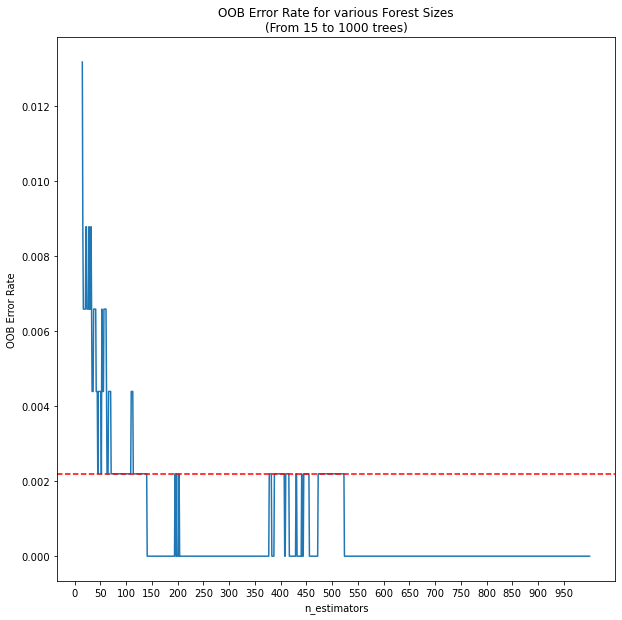

In [261]:
# Plotting oob error rate v/s no. of Decision Trees (n_estimators)
plt.subplots(figsize = (10,10))
oob_series.plot()
plt.xlabel('n_estimators')
plt.axhline(0.0022, color='r',linestyle='--')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate for various Forest Sizes\n(From 15 to 1000 trees)')
plt.xticks(range(0,1000,50))
plt.show()

- From above graph we can observe minimum and stable oob error rate with optimal no. of DTs of 130.
- Note :- We will not consider zero oob error rate because it may be the case of overfitting

In [262]:
print('OOB error rate for 120 trees = {}'.format(round(oob_series[130],5)))

OOB error rate for 120 trees = 0.0022


In [263]:
# Refine the RF via OOB output
fit_rf.set_params(n_estimators = 130, warm_start =False, oob_score = False)

RandomForestClassifier(max_depth=5, n_estimators=130, random_state=42)

### Train the Random Forest

In [264]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=130, random_state=42)

### Variable Importance

In [265]:
# list of mean decrease in gini impurity by features in the RF
gini_red = list(fit_rf.feature_importances_)

In [266]:
# list of feature names in rf
variables  = data.columns[1:]

In [267]:
# Data Frame showing mean gini reduction done by each feature
dic = {'features' : variables, 'mean_impurity_decrease' : gini_red}
var_imp_df = pd.DataFrame(dic)
var_imp_df.sort_values(by= 'mean_impurity_decrease', ascending = True, inplace = True, ignore_index = True)
var_imp_df.set_index('features', inplace = True)
var_imp_df.drop('diagnosis', axis = 0, inplace = True) # As Diagnosis is target variable, so dropping it.
var_imp_df

,mean_impurity_decrease
features,
compactness_se,0.000846
symmetry_se,0.000951
symmetry_mean,0.001276
smoothness_se,0.001502
fractal_dimension_worst,0.002034
texture_se,0.002216
fractal_dimension_mean,0.002608
concave points_se,0.002887
fractal_dimension_se,0.003489


Text(0, 0.5, 'Feature')

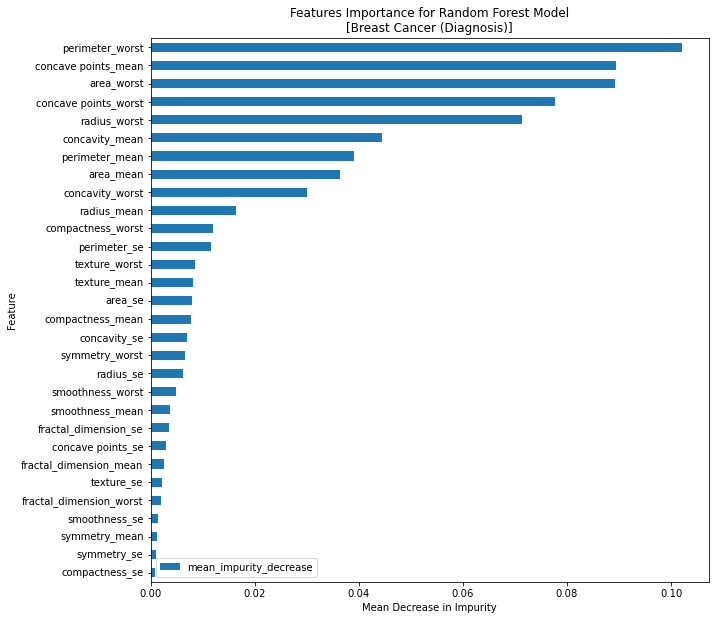

In [268]:
var_imp_df.plot(kind = 'barh', figsize = (10,10))
plt.title('Features Importance for Random Forest Model\n[Breast Cancer (Diagnosis)]')
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature')

### Predictions

In [269]:
predictions_rf = fit_rf.predict(x_test)

### Recall

In [270]:
# True Positives
TP = []
for i,j in zip(y_test,predictions_rf):
    if i == 1 and j == 1 :
        TP.append((i,j))
print('Total no. of True Positives = ',len(TP))
# Total no. of actual positives are :-
cnt = 0
for i in y_test:
    if i == 1:
        cnt += 1
print('Total no. of actual positives = ',cnt)
print('Recall = ',len(TP)/cnt)

Total no. of True Positives =  43
Total no. of actual positives =  43
Recall =  1.0


### Confusion Matrix

In [271]:
con_mat = pd.DataFrame(confusion_matrix(y_test,predictions_rf))
con_mat

,0,1
0,71,0
1,0,43


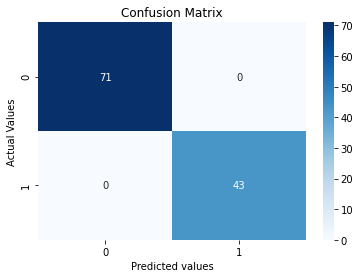

In [272]:
sns.heatmap(con_mat, annot = True , cmap = 'Blues')
plt.xlabel('Predicted values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()

### Accuracy

In [273]:
accuracy_rf = fit_rf.score(x_test,y_test)
print('Accuracy on test set for RF model = ',accuracy_rf)

Accuracy on test set for RF model =  1.0


### Error Rate

In [274]:
# Here we calculate test error rate
test_error_rate_rf = 1 - accuracy_rf
print('The test error rate for RF model = ',test_error_rate_rf)

The test error rate for RF model =  0.0


### ROC-AUC Curve

In [275]:
# Probability estimate of true positive class for testing data [1 -> positive class]
pos_pred_prob = fit_rf.predict_proba(x_test)
pos_pred_prob_test = pd.DataFrame(pos_pred_prob).iloc[:,1:]

In [276]:
# ROC Curve
fpr , tpr , thresholds = roc_curve(y_test,pos_pred_prob_test, pos_label = 1)

In [277]:
# Area under ROC Curve
auc_rf = auc(fpr,tpr)
auc_rf

1.0

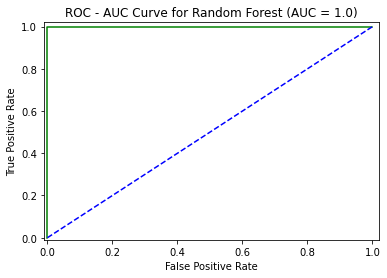

In [278]:
# Plotting ROC - AUC Curve
plt.plot(fpr,tpr, color = 'g')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC Curve for Random Forest (AUC = {})'.format(auc_rf))
plt.plot([0,1],[0,1],linestyle = '--', color = 'b')
plt.xlim(-0.01,1.02)
plt.ylim(-0.01,1.02)
plt.show()

### Classification Report

In [280]:
class_report = classification_report(y_test, predictions_rf, target_names  = ['Benign', 'Malignant'])
print('Classification Report of Random Forest Model :\n',class_report)

Classification Report of Random Forest Model :
               precision    recall  f1-score   support

      Benign       1.00      1.00      1.00        71
   Malignant       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

